# Project: Wrangling and Analyze Data- WeRateDogs


## by Mofeoluwa Jide-Jegede

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Data Gathering</a></li>
<li><a href="#assess and clean">Data Assessment and Cleaning</a></li>
<li><a href="#storing">Storing Data </a></li>
<li><a href="#ins and viz">Insights and Visualizations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sb
from timeit import default_timer as timer

%matplotlib inline

<a id='intro'></a>

## Introduction

### Datasets Description 

> There are three sources of data in this project
1. Basic archived data from WeRateDogs
2. Dog breeds prediction provided by a volunteer who used a neutral network classification process on images attached to tweets
3. Live data tweets downloaded using the Twitter API. 

<a id='gather'></a>
## Data Gathering

Basic archived data in CSV format from WeRateDogs

In [2]:
df=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
archive_df=df.copy()

Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# Make directory if it doesn't already exist
folder_name = 'new_folder'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)


In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

response
    

<Response [200]>

In [6]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [7]:
image_df = pd.read_csv('image-predictions.tsv', sep = '\t')

Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
consumer_key = '****************'
consumer_secret = '****************'
access_token = '****************'
access_secret = '****************'


In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [7]:
api = tweepy.API(auth, wait_on_rate_limit= True)  

In [10]:
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

2356

In [11]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 663


Success
901: 758740312047005698
Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Fail
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932

Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
1183: 718971898235854848
Success
11

Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
1432: 697516214579523584
Success
14

Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
1681: 682003177596559360
Success
16

Rate limit reached. Sleeping for: 651


Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
18

Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
20

Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
23

In [8]:
tweets = pd.read_json('tweet_json.txt', lines=True)

In [9]:
tweet_file = 'tweet_json.txt'

In [10]:
# read in the JSON data from the text file, and save to a DataFrame
tweet_data = []

with open(tweet_file, 'r') as json_file:
    # read the first line to start the loop
    line = json_file.readline()
    while line:
        data = json.loads(line)

        # extract variables from the JSON data
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        
        # create a dictionary with the JSON data, then add to a list
        json_data = {'tweet_id': tweet_id, 
                     'retweet_count': retweet_count, 
                     'favorite_count': favorite_count
                    }
        tweet_data.append(json_data)

        # read the next line of JSON data
        line = json_file.readline()
        

# convert the tweet JSON data dictionary list to a DataFrame
tweets_df = pd.DataFrame(tweet_data, 
                                   columns = ['tweet_id',
                                              'retweet_count',
                                              'favorite_count'])

<a id='assess and clean'></a>
## Data Assessment and Cleaning

In this section, I detected and documented at least **eight (8) quality issues and two (2) tidiness issue** using both visual assessment and programmatic assessement to assess the data.
Starting out, I made a copy of the data I gathered.

In [11]:
tweet_df=tweets_df.copy()

In [12]:
tweet_df.head()


,tweet_id,retweet_count,favorite_count
0,892420643555336193,6943,33488
1,892177421306343426,5246,29035
2,891815181378084864,3456,21830
3,891689557279858688,7161,36540
4,891327558926688256,7686,34958


In [13]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2325 non-null   int64
 1   retweet_count   2325 non-null   int64
 2   favorite_count  2325 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [14]:
sum(tweet_df.duplicated())

0

In [15]:
tweet_df.to_csv('tweet.csv', index = False)


The tweet_df has one quality issue, the tweet_id should not be an int datatype. However, the data frame is well structured since only the tweet_id, retweet_count, and favorite_count were extracted.

In [16]:
image_predictions= image_df.copy()

In [17]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
sum(image_predictions.duplicated())

0

The image_predictions data frame has one quality issue the tweet_id should not be an int datatype. The data frame is not well structured has there are multiple rows of predictions, prediction confidence, and the likelihood of prediction being True and False. Each of these values needs to be merged to make better sense of the data.


In [20]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [21]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [22]:
sum(archive_df.duplicated())

0

The archive_df data frame has several quality and tidiness issues.
1. The tweet_id should not be an int datatype.
2. The entries for retweeted tweets should be dropped as this analysis focuses on original tweets.
3. The replies to tweets should also be dropped.
4. The timestamp column should be a DateTime datatype, not an object.
5. The rating_denominator has to be set to 10 because, as stated earlier, the denominator is usually 10.
6. The data frame is not well structured, as there are multiple rows of dog stages. The Doggo, Floofer, Pupper, and Puppo columns need to be merged to make better sense of the data.

## Tidiness Issue 1

As we previously noted from the initial assessment, the image_predictions data frame is not well structured because there are multiple rows of predictions, prediction confidence, and the likelihood of prediction being True and False. Each of these values needs to be merged to make better sense of the data.

### Define

The image_predictions data frame has multiple rows of p1,p2,p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, and p3_dog. Each of these columns needs to be merged to make better sense of the data.

### Code

In [23]:
#to merge the columns

#the conditions for selection of predictions
conditions = [(image_predictions['p1_dog'] == True),
              (image_predictions['p2_dog'] == True),
              (image_predictions['p3_dog'] == True)]

#list predictions in the order of precedence
predictions = [image_predictions['p1'], 
                 image_predictions['p2'],
                 image_predictions['p3']]

#list prediction confidence in the order of precedence
prediction_confidence = [image_predictions['p1_conf'], 
                      image_predictions['p2_conf'], 
                      image_predictions['p3_conf']]

# choose the predicted breed 
# based on the first successful condition
image_predictions['breed'] = np.select(conditions, 
                                       predictions, 
                                       default = 'none')

# choose the predicted confidence level 
#based on the first successful condition
image_predictions['confidence'] = np.select(conditions, 
                                            prediction_confidence, 
                                            default = 0)

In [24]:
#drop columns not needed
image_predictions = image_predictions.drop(['p1','p2','p3','p1_conf','p2_conf','p3_conf','p1_dog','p2_dog','p3_dog'], axis=1)

### Test

In [25]:
image_predictions.head()

,tweet_id,jpg_url,img_num,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


In [26]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   img_num     2075 non-null   int64  
 3   breed       2075 non-null   object 
 4   confidence  2075 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.2+ KB


After merging we see that the table looks more presentable and understandable.

## Tidiness Issue 2

### Define


The archive dataframe is not well structured has there are multiple rows of dog stages. The doggo, floofer, pupper and puppo columns need to be merged to make better sense of the data.

### Code

In [27]:
# Define: use loc to add a new column dog_stage = doggo, floofer, pupper or poppo. NaN will be used if not any of the previous

archive_df.loc[archive_df['doggo']=='doggo', 'dog_stage'] = 'doggo'
archive_df.loc[archive_df['floofer'] == 'floofer', 'dog_stage'] = 'floofer'
archive_df.loc[archive_df['pupper'] == 'pupper', 'dog_stage'] = 'pupper'
archive_df.loc[archive_df['puppo'] == 'puppo', 'dog_stage'] = 'puppo'


In [28]:
archive_df['dog_stage'].value_counts()

pupper     257
doggo       83
puppo       30
floofer     10
Name: dog_stage, dtype: int64

In [29]:
archive_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace=True)

### Test

In [30]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   380 n

After merging the dog stages we see that the information in the dog_stages column helps to give a more presentable and understandable outlook to the different dog stages of the dogs in this analysis.

## Quality Issue 1

### Define


The timestamp has a datatype of object, instead of datetime. So we have to fix that.

In [31]:
#timedstamp should have datetime dtype
archive_df['timestamp'] = pd.to_datetime(archive_df.timestamp)


### Code

In [32]:
archive_df['timestamp'] = archive_df.timestamp.dt.floor('s')


### Test

In [33]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

From the information above, we can see that the timestamp is now in datetime format.

## Quality Issue 2

I checked to see the source of tweets as it will be useful in this analysis. This was the first programmatic assessment.

In [34]:
#check the source column in archive_df
archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### Define


As we can see, there are 4 different sources but the quality of the data is very poor and not easily readable.To solve this, I'll change the sources to a format that is easily readable and presentable.

### Code

In [35]:
#replace links with readable text
archive_df.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','iPhone', inplace=True)
archive_df.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine' ,inplace=True)
archive_df.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web', inplace=True)
archive_df.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck' ,inplace=True)

### Test

In [36]:
archive_df.source.value_counts()

iPhone         2221
Vine             91
Twitter Web      33
TweetDeck        11
Name: source, dtype: int64

From the new value count of the sources, we can see the quality of the data has been really improved. We can see more clearly that the sources are Iphone, Vine, Twitter web and Tweetdeck.

## Quality Issue 3

I checked to see the names of dogs as it will be useful in this analysis

In [37]:
name=archive_df.name.value_counts()

In [38]:
name.head(50)

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Tucker       10
Penny        10
Lola         10
Winston       9
Bo            9
Sadie         8
the           8
Daisy         7
Buddy         7
Toby          7
an            7
Bailey        7
Leo           6
Oscar         6
Stanley       6
Rusty         6
Bella         6
Dave          6
Jack          6
Koda          6
Scout         6
Jax           6
Milo          6
Louis         5
Phil          5
Sammy         5
Gus           5
Chester       5
Alfie         5
Sunny         5
Bentley       5
very          5
Oakley        5
Finn          5
George        5
Larry         5
Clarence      4
Loki          4
Walter        4
Reggie        4
Hank          4
Scooter       4
Duke          4
quite         4
Name: name, dtype: int64

In [39]:
name.tail(30)

Linus         1
Shiloh        1
Gustav        1
Arlen         1
Lenox         1
Harvey        1
Blanket       1
Geno          1
Lilah         1
Stewie        1
Zoe           1
Gilbert       1
Rose          1
Theo          1
Fido          1
Emma          1
Spencer       1
Lilli         1
Boston        1
Brandonald    1
Corey         1
Leonard       1
Beckham       1
Devón         1
Gert          1
Dex           1
Ace           1
Tayzie        1
Grizzie       1
Christoper    1
Name: name, dtype: int64

From this assesment we can see most names start with uppercase letters. The ones with small letters do not seem to be names or anything tangible or relevant to this analysis. Just to be sure we'll take a look at the names starting with lowercase

In [40]:
# list all names starting with a lowercase
lowercase = archive_df.name.str.contains('^[a-z]', regex = True)


In [41]:
archive_df[lowercase].name.value_counts()

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
getting          2
actually         2
mad              2
not              2
old              1
life             1
officially       1
light            1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64

### Define


Now that I have confirmed that the lowercaces 'names' are not relevant names, the irrelevant names need to be set to None. 

### Code

In [42]:
# Replace irrelevant names; the names starting with lower case with None
archive_df.name = archive_df.name.apply(lambda x : 'None' if x[0].islower() else x)


In [43]:
# Check that the lowercase names have been removed
assert archive_df.name.apply(lambda x : x[0].isupper()).all()



### Test

In [44]:
archive_df.name.value_counts()

None          854
Charlie        12
Lucy           11
Cooper         11
Oliver         11
             ... 
Devón           1
Gert            1
Dex             1
Ace             1
Christoper      1
Name: name, Length: 932, dtype: int64

From the recent value count of the name column, we can see the lowercase names have been changed to none.

## Quality Issue 4

### Define


For the purpose of this analysis, we would not be needing the actual names of the dogs. Hence, we would only save proper names in the name column.

### Code

In [45]:
archive_df = archive_df[archive_df["name"].str.contains("None") == False]
 

### Test

In [46]:
archive_df.name.value_counts()

Charlie       12
Lucy          11
Cooper        11
Oliver        11
Lola          10
              ..
Devón          1
Gert           1
Dex            1
Ace            1
Christoper     1
Name: name, Length: 931, dtype: int64

I checked to see "None" has been dropped from the name column. 

### Define

There are still some names in the name column with null values. For the purpose of this analysis, I want to focus on dogs with names.

### Code

In [49]:
archive_df = archive_df[archive_df['name'].notna()]

### Test

In [50]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 2325
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1502 non-null   int64              
 1   in_reply_to_status_id       1 non-null      float64            
 2   in_reply_to_user_id         1 non-null      float64            
 3   timestamp                   1502 non-null   datetime64[ns, UTC]
 4   source                      1502 non-null   object             
 5   text                        1502 non-null   object             
 6   retweeted_status_id         111 non-null    float64            
 7   retweeted_status_user_id    111 non-null    float64            
 8   retweeted_status_timestamp  111 non-null    object             
 9   expanded_urls               1502 non-null   object             
 10  rating_numerator            1502 non-null   int64           

It has been confirmed that the rows of the null values of name have been dropped.

## Tidiness Issue 3

### Define


For the purpose of this analysis, we need to combine the dataframes together, that is, archive_df, image_predictions and tweet_df for better presentation and easier assessment and analysis.

### Code

In [51]:
combined_df= pd.merge(archive_df, tweet_df, on='tweet_id', how='outer')

In [52]:
combined_df= pd.merge(combined_df, image_predictions, on='tweet_id', how='outer')

### Test

In [53]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2349 entries, 0 to 2348
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2349 non-null   int64              
 1   in_reply_to_status_id       1 non-null      float64            
 2   in_reply_to_user_id         1 non-null      float64            
 3   timestamp                   1502 non-null   datetime64[ns, UTC]
 4   source                      1502 non-null   object             
 5   text                        1502 non-null   object             
 6   retweeted_status_id         111 non-null    float64            
 7   retweeted_status_user_id    111 non-null    float64            
 8   retweeted_status_timestamp  111 non-null    object             
 9   expanded_urls               1502 non-null   object             
 10  rating_numerator            1502 non-null   float64         

Then we check to see the columns in the combined dataframe. We now have a total of 19 columns.

## Quality Issue 5

### Define


From the intial assessment, the focus is on original tweets hence we would make all the retweeted tweets null.

### Code

In [54]:
combined_df = combined_df[combined_df.retweeted_status_id.isna()]

### Test

In [55]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2238 entries, 0 to 2348
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2238 non-null   int64              
 1   in_reply_to_status_id       1 non-null      float64            
 2   in_reply_to_user_id         1 non-null      float64            
 3   timestamp                   1391 non-null   datetime64[ns, UTC]
 4   source                      1391 non-null   object             
 5   text                        1391 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1391 non-null   object             
 10  rating_numerator            1391 non-null   float64         

I check to see if all the retweed_status_id values is null

## Quality Issue 6

### Define

From the intial assessment, the focus is on original tweets hence we would make all the reply to tweets null.

### Code

In [56]:
combined_df = combined_df[combined_df.in_reply_to_status_id.isna()]

### Test

In [57]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2348
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2237 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   1390 non-null   datetime64[ns, UTC]
 4   source                      1390 non-null   object             
 5   text                        1390 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1390 non-null   object             
 10  rating_numerator            1390 non-null   float64         

I checked to confirm that all the in_reply_to_status_id values is null

## Tidiness Issue 4

### Define

Now that retweeted_status_id, in_reply_to_status_id and other associated columns have no data, for a more tidy dataframe we need to drop these columns.

### Code

In [58]:
#drop columns not needed
combined_df = combined_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

### Test

In [59]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2348
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2237 non-null   int64              
 1   timestamp           1390 non-null   datetime64[ns, UTC]
 2   source              1390 non-null   object             
 3   text                1390 non-null   object             
 4   expanded_urls       1390 non-null   object             
 5   rating_numerator    1390 non-null   float64            
 6   rating_denominator  1390 non-null   float64            
 7   name                1390 non-null   object             
 8   dog_stage           184 non-null    object             
 9   retweet_count       2221 non-null   float64            
 10  favorite_count      2221 non-null   float64            
 11  jpg_url             2027 non-null   object             
 12  img_num             2027 non-null 

Now, it is confirmed that the irrelevant colunms have been deleted. The combined dataframe now has a total of 14 columns.

## Quality Issue 7

### Define

As noted in the initial visual assessment, the datatype of the tweet id cannot be in int format. Hence it has to be converted to a object format.

### Code

In [60]:
combined_df.tweet_id=combined_df.tweet_id.astype(object)

### Test

In [61]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2348
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2237 non-null   object             
 1   timestamp           1390 non-null   datetime64[ns, UTC]
 2   source              1390 non-null   object             
 3   text                1390 non-null   object             
 4   expanded_urls       1390 non-null   object             
 5   rating_numerator    1390 non-null   float64            
 6   rating_denominator  1390 non-null   float64            
 7   name                1390 non-null   object             
 8   dog_stage           184 non-null    object             
 9   retweet_count       2221 non-null   float64            
 10  favorite_count      2221 non-null   float64            
 11  jpg_url             2027 non-null   object             
 12  img_num             2027 non-null 

I have now confirmed that the tweet_id has a datatype of object.

## Quality Issue 8

### Define

The rating denominator is almost always 10. Hence, I would be dropping any row with a different value of rating_denominator asides from 10.

### Code

In [62]:
combined_df = combined_df[combined_df["rating_denominator"] == 10]

### Test

In [63]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 0 to 1501
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1387 non-null   object             
 1   timestamp           1387 non-null   datetime64[ns, UTC]
 2   source              1387 non-null   object             
 3   text                1387 non-null   object             
 4   expanded_urls       1387 non-null   object             
 5   rating_numerator    1387 non-null   float64            
 6   rating_denominator  1387 non-null   float64            
 7   name                1387 non-null   object             
 8   dog_stage           184 non-null    object             
 9   retweet_count       1380 non-null   float64            
 10  favorite_count      1380 non-null   float64            
 11  jpg_url             1346 non-null   object             
 12  img_num             1346 non-null 

I checked to confirm that rows with a different value of rating_denominator asides from 10 have been dropped.

<a id='storing'></a>
## Storing Data

The gathered, assessed, and cleaned master dataset is then saved to a CSV file named "twitter_archive_master.csv".

In [64]:
# Saving df as csv
combined_df.to_csv('twitter_archive_master.csv')

<a id='ins and viz'></a>
## Insights and Visualization

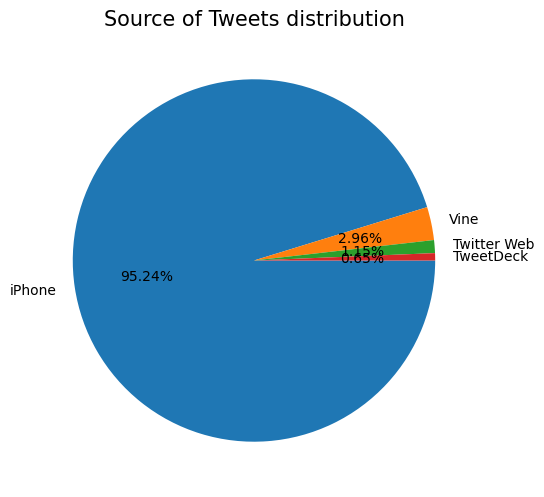

In [65]:
#pie chart of source of tweets
plt.figure(figsize=(20,6), dpi=100)
sc = combined_df['source'].value_counts()
plt.pie(sc, labels = sc.index, startangle = 0,
        counterclock = False, autopct='%1.2f%%');
#plt.axis('square')
plt.title('Source of Tweets distribution', fontsize=15);


The pie chart aims to show the distribution of the source of tweets in the data. It tells us that iPhone is the highest with 95.24% of the data, followed by Vine with just 2.96% and Twitter web and TweetDeck with 1.15% and 0.65% respectively.

In [66]:
base_color= sb.color_palette()[0]

In [67]:
#function to plot a countplot
def myCountPlot(df,var):

    #set plot dimensions
    plt.figure(figsize=[14,8])
    
    #plot
    sb.countplot(data=df,x=var,edgecolor='black', color=base_color);
    
    #Add title and format it
    plt.title(f'''Distribution of {var}'''.title() , fontsize=14 , weight='bold')
    
    #Add y label and format it
    plt.xlabel(var.title( ),fontsize=10 ,weight='bold')

    #Add y label and format it
    plt.ylabel ('Frequency'.title(), fontsize=10 ,weight='bold')

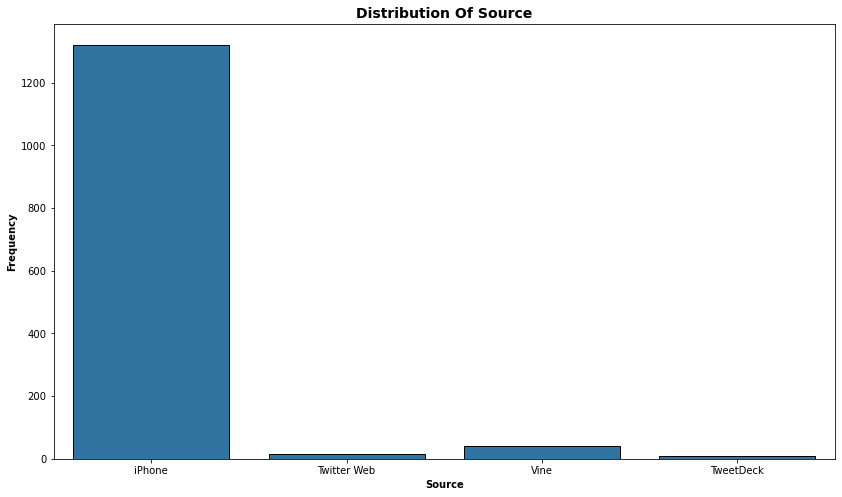

In [68]:
myCountPlot(combined_df, 'source')

To give a clearer distribution of the source of tweets in the data, I use a bar plot show the distribution. Once again, it is clear that iPhone is the most common source of tweets while the remaining source, Vine, Twitter web and TweetDeck are barely significant.

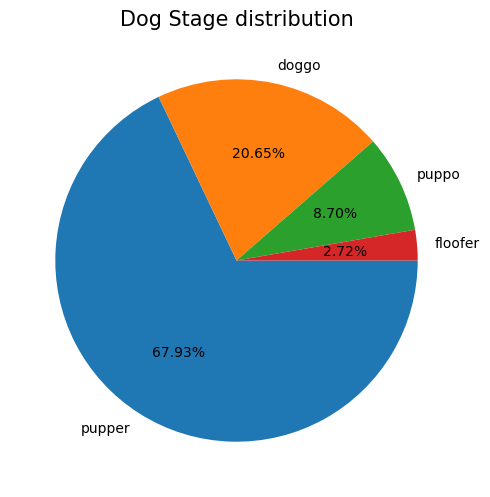

In [69]:
#pie chart of source of tweets
plt.figure(figsize=(20,6), dpi=100)
sc = combined_df['dog_stage'].value_counts()
plt.pie(sc, labels = sc.index, startangle = 0,
        counterclock = False, autopct='%1.2f%%');
#plt.axis('square')
plt.title('Dog Stage distribution', fontsize=15);

The pie chart above shows the distribution of dog_stages and their percentage in the data. Pupper takes the lead with 67.93%, followed by Doggo with 20.65%, Puppo with 8.7% and Floofer with 2.72%

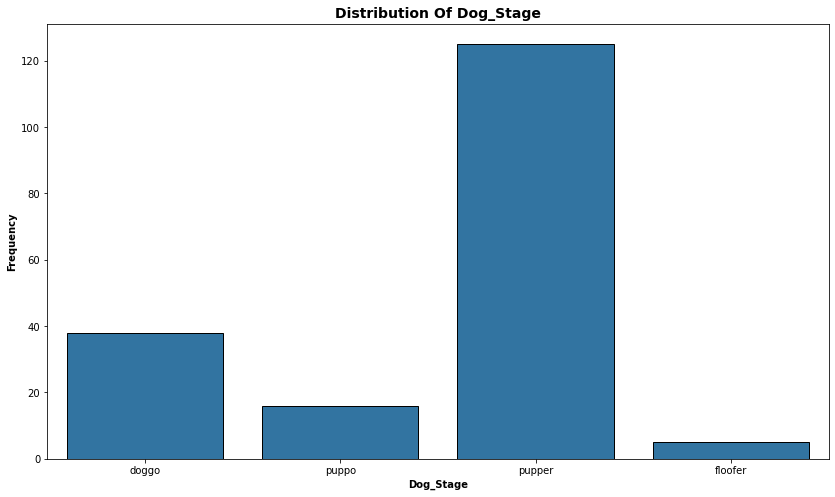

In [70]:
myCountPlot(combined_df, 'dog_stage')

The bar char above further supports the distribution of the pie chart. However, we can see from the frequency of the dog stages, a lot of tweets do not have the dog stages specified. This tells us that we cannot really go by this data to make any serious conclusions regarding the stages of the dogs in the data. 

In [71]:
top_10_dog_names= combined_df.name.value_counts(10)

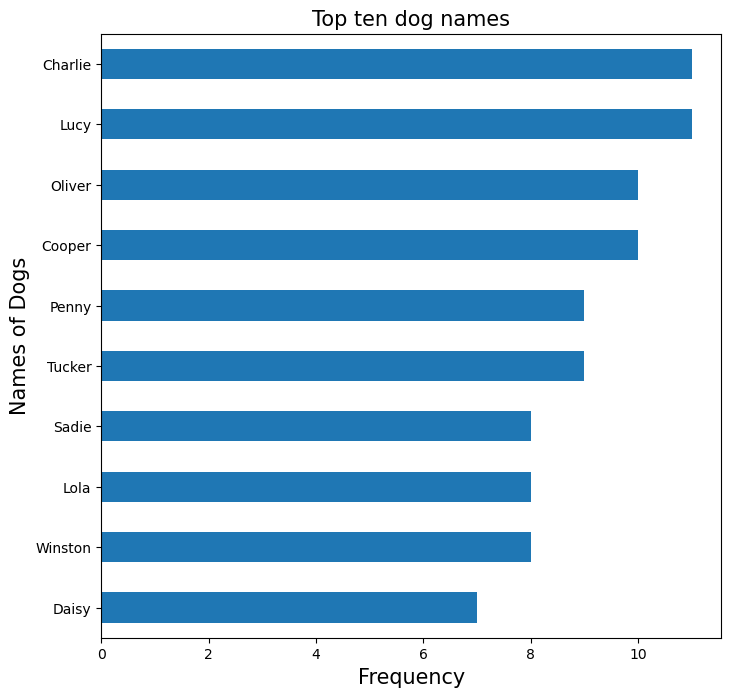

In [72]:
plt.figure(figsize=(8,8), dpi = 100)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Names of Dogs', fontsize=15)
plt.title('Top ten dog names', fontsize=15)

combined_df.name.value_counts(ascending=True).tail(10).plot.barh();

The horizontal bar plot shows the top 10 dog names in the data. Charlie, Lucy and Oliver top the list.

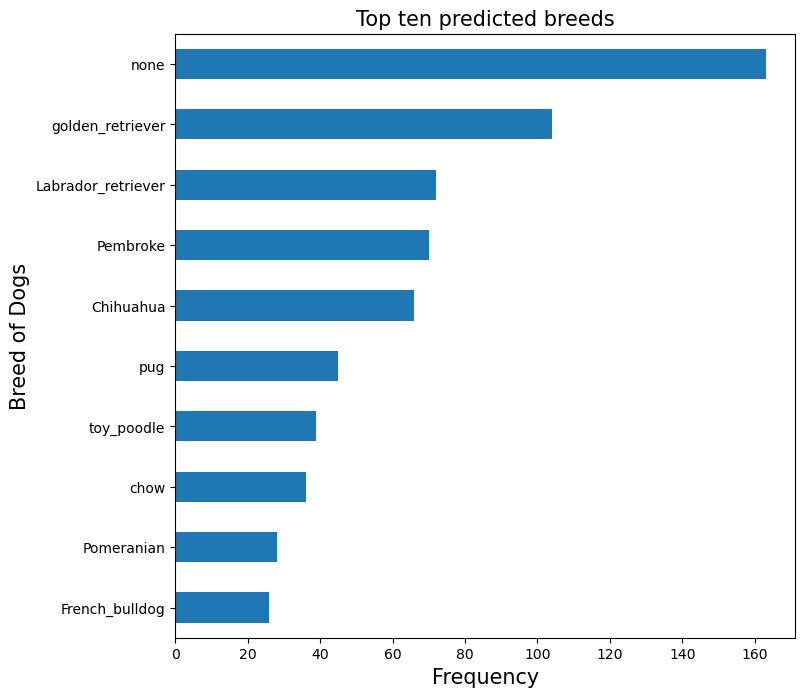

In [73]:
plt.figure(figsize=(8,8), dpi = 100)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Breed of Dogs', fontsize=15)
plt.title('Top ten predicted breeds', fontsize=15)

combined_df.breed.value_counts(ascending=True).tail(10).plot.barh();

The horizontal bar plot shows the top 10 breeds of dog in the data. As we can see, there are a lot of dogs without breed prediction. However, golden_retriever is the most common breed of dogs present in this data.

In [74]:
#function to show information about highest and lowest values of different colums

def highest_and_lowest(column):

        highest = combined_df[column].idxmax()
        highest_info = pd.DataFrame(combined_df.loc[highest])
    
        lowest = combined_df[column].idxmin()
        lowest_info = pd.DataFrame(combined_df.loc[lowest])
        
        info_table = pd.concat([highest_info, lowest_info], axis = 1)
        return info_table
       

In [75]:
highest_and_lowest('retweet_count')

,382,1500
tweet_id,807106840509214720,666447344410484738
timestamp,2016-12-09 06:17:20+00:00,2015-11-17 02:46:43+00:00
source,iPhone,iPhone
text,This is Stephan. He just wants to help. 13/10 ...,This is Scout. She is a black Downton Abbey. I...
expanded_urls,https://twitter.com/dog_rates/status/807106840...,https://twitter.com/dog_rates/status/666447344...
rating_numerator,13.0,9.0
rating_denominator,10.0,10.0
name,Stephan,Scout
dog_stage,NaN,NaN
retweet_count,51184.0,19.0


I checked to see the information of the tweet with the most retweets and least retweets. The most retweeted tweet is about a Chihuahua named Stephan, who got a 13/10 rating. I'm sure Stephan must have been ridiculously cute. The least retweeted tweet was about a curly-coated retriever named Scout.

In [76]:
highest_and_lowest('favorite_count')

,382,1500
tweet_id,807106840509214720,666447344410484738
timestamp,2016-12-09 06:17:20+00:00,2015-11-17 02:46:43+00:00
source,iPhone,iPhone
text,This is Stephan. He just wants to help. 13/10 ...,This is Scout. She is a black Downton Abbey. I...
expanded_urls,https://twitter.com/dog_rates/status/807106840...,https://twitter.com/dog_rates/status/666447344...
rating_numerator,13.0,9.0
rating_denominator,10.0,10.0
name,Stephan,Scout
dog_stage,NaN,NaN
retweet_count,51184.0,19.0


I checked to see the information of the tweet with the most and least likes. Once again, the most liked tweet is about a Chihuahua named Stephan, who got a 13/10 rating. The least-liked tweet was also about the curly-coated retriever named Scout. This shows a linear relationship between retweets and likes.

In [77]:
#popular names according to RT (top 5)
popular_names_byRT=combined_df.groupby('name')['retweet_count'].sum()
pn_RT=popular_names_byRT.nlargest(5)

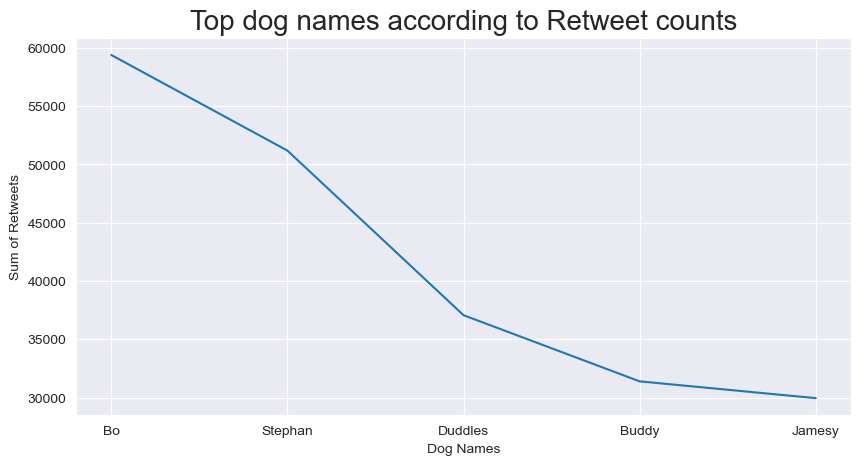

In [78]:
#line plot of popular names according to RT
sb.set_style('darkgrid')
plt.figure(figsize=(10,5), dpi = 100)
plt.xlabel('Dog Names', fontsize = 10)
plt.ylabel('Sum of Retweets', fontsize = 10)
plt.title('Top dog names according to Retweet counts', fontsize = 20)
plt.plot(pn_RT);

The line plot above shows the most popular name of dogs according to the sum of retweets they get. This is a bit different from the frequency of name but still gives us a little insight.

In [79]:
#popular names according to Likes (top 5)
popular_names_byLikes=combined_df.groupby('name')['favorite_count'].sum()
pn_Likes=popular_names_byLikes.nlargest(5)

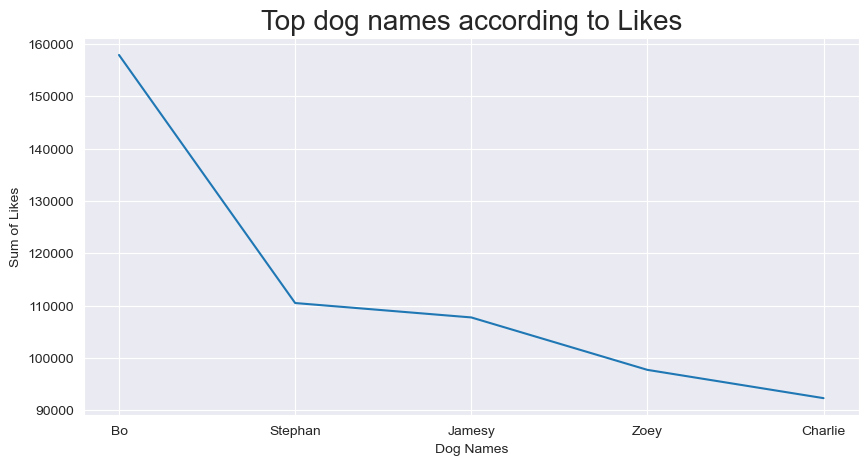

In [80]:
#line plot of popular names according to Likes
sb.set_style('darkgrid')
plt.figure(figsize=(10,5), dpi = 100)
plt.xlabel('Dog Names', fontsize = 10)
plt.ylabel('Sum of Likes', fontsize = 10)
plt.title('Top dog names according to Likes', fontsize = 20)
plt.plot(pn_Likes);

The line plot above shows the most popular name of dogs according to the sum of likes they get. This is a bit different from the preceeding line plot. However the first two names remain the same, Bo and Stephan.

In [81]:
#popular breeds according to RT
popular_breed_byRT=combined_df.groupby('breed')['retweet_count'].sum()
pb_RT=popular_breed_byRT.nlargest(5)

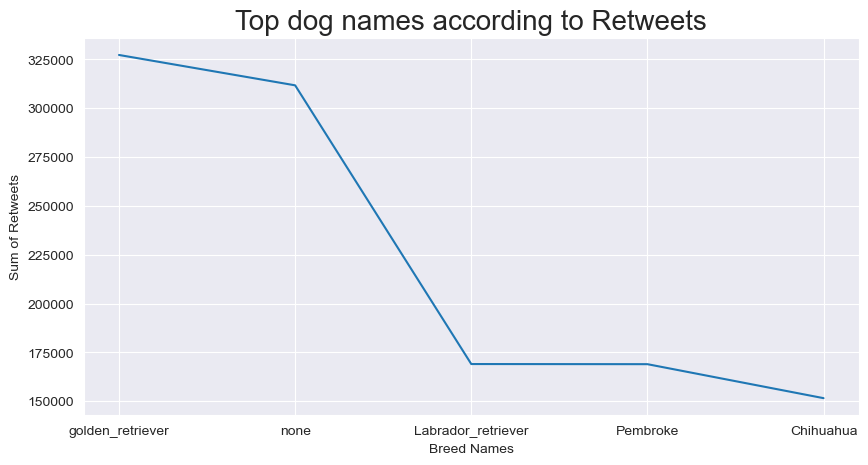

In [82]:
#line plot of popular breeds according to RT
sb.set_style('darkgrid')
plt.figure(figsize=(10,5), dpi = 100)
plt.xlabel('Breed Names', fontsize = 10)
plt.ylabel('Sum of Retweets', fontsize = 10)
plt.title('Top dog names according to Retweets', fontsize = 20)
plt.plot(pb_RT);

The line plot above shows the most popular breed of dogs according to the sum of retweets they get. This tells us that the most popular breed is a golden retriever which agrees to the highest frequency of breeds as previously plotted.

In [83]:
#popular breeds according to Likes
popular_breed_byLikes=combined_df.groupby('breed')['favorite_count'].sum()
pb_Likes=popular_breed_byLikes.nlargest(5)

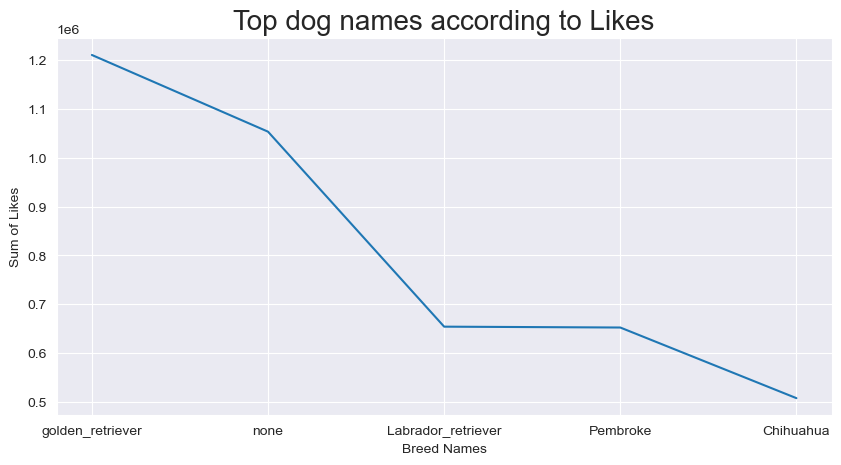

In [84]:
#line plot of popular breeds according to Likes
sb.set_style('darkgrid')
plt.figure(figsize=(10,5), dpi = 100)
plt.xlabel('Breed Names', fontsize = 10)
plt.ylabel('Sum of Likes', fontsize = 10)
plt.title('Top dog names according to Likes', fontsize = 20)
plt.plot(pb_Likes);

The line plot above shows the most popular breed of dogs according to the sum of likes they get. This tells us agrees that the most popular breed is a golden retriever. The plot in this case as a lot of similarity to the popularity of breeds according to retweets.

<a id='conclusions'></a>
## Conclusions

In conclusion, this project taught me how to use the Request library and Tweepy library, which would be very useful in gathering data.
The assessment and cleaning section also allowed me to look closely for patterns in data. It also allowed me to decide the best ways to use codes to find answers to questions I may have about a dataset.
Finally, from the visualization, I got several insights about the data. It showed that Twitter for iPhone was the most popular source of data. The most common dog stage, according to the data present, is the Pupper. The top 3 dog names are Charlie, Lucy, and Oliver. However, according to retweets and likes, the most popular dog names were Bo and Stephan. The most common breed of dog is the Golden retriever.